## K Means Clustering

In [37]:
## Copied from https://www.codementor.io/jadianes/data-science-python-pandas-r-dimensionality-reduction-du1081aka

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
existing_df1 = pd.read_csv("data\Traffic_Violations_Counts.csv", index_col = 0, thousands  = ',')
existing_df1.index.names = ['Dates']
existing_df1.columns.names = ['Channels']

In [8]:
existing_df=existing_df1.fillna(0)

In [12]:
from sklearn.decomposition import PCA
    
pca = PCA(n_components=2)
pca.fit(existing_df)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [13]:
PCA(copy=True, n_components=2, whiten=False)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [14]:
existing_2d = pca.transform(existing_df)

In [15]:
from sklearn.cluster import KMeans
    
kmeans = KMeans(n_clusters=5)
clusters = kmeans.fit(existing_df)

In [20]:
existing_df_2d = pd.DataFrame(existing_2d)
existing_df_2d.index = existing_df.index
existing_df_2d.columns = ['PC1','PC2']
existing_df_2d.head()

,PC1,PC2
Dates,,
02/01/2017 0:00,-57.600044,-11.429650
02/02/2017 0:00,-82.122523,-13.227102
02/03/2017 0:00,-129.551288,-75.614128
02/04/2017 0:00,-364.792135,-18.188011
02/05/2017 0:00,-346.998824,239.316087


In [21]:
existing_df_2d['cluster'] = pd.Series(clusters.labels_, index=existing_df_2d.index)

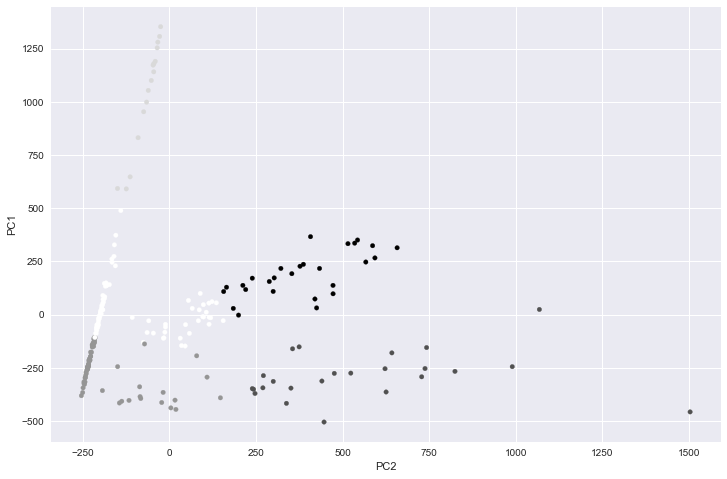

In [24]:
%matplotlib inline
import numpy as np
    
existing_df_2d.plot(
        kind='scatter',
        x='PC2',y='PC1',
        c=existing_df_2d.cluster.astype(np.float), 
        figsize=(12,8))

In [38]:
## Copied from https://github.com/saramille/Breast-cancer-Data-analysis/blob/master/breast_cancer-classification%20modeling.ipynb

In [27]:
P=existing_df.iloc[:,1:15]

In [30]:
from sklearn.preprocessing import StandardScaler

# standardizing and PCA
scaler = StandardScaler()
P_scaled=scaler.fit_transform(P)
P_scaled=pd.DataFrame(P_scaled)
PP=P_scaled.drop(P_scaled.columns[[2, 3, 7, 10, 12, 13]], axis=1) 
pca=PCA(n_components=0.95)
P_pca=pca.fit_transform(PP)
print (P_pca.shape)
print(pca.explained_variance_ratio_) 
print (pca.explained_variance_ratio_.sum())

(226L, 4L)
[ 0.53522163  0.2334667   0.13560217  0.05590609]
0.960196590975


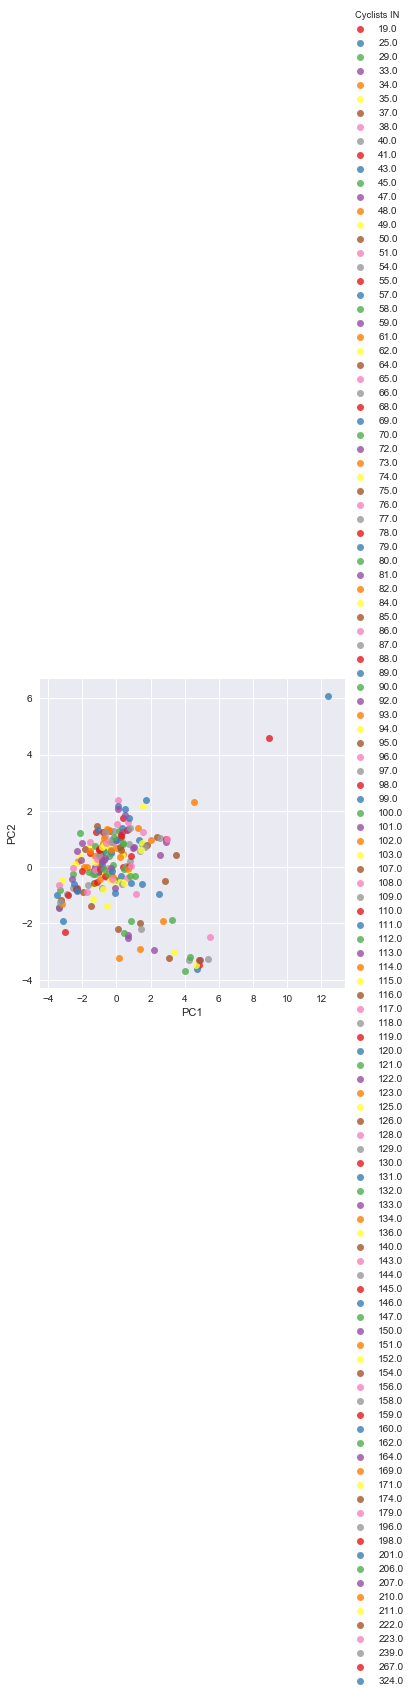

In [35]:
n=['PC1','PC2','PC3','PC4','Cyclists IN']
d=existing_df.iloc[:,1:2]
Xy=pd.DataFrame(np.hstack([P_pca,d.as_matrix()]),columns=n)
# plotting the the first 2 pca components
sns.lmplot("PC1", "PC2", hue="Cyclists IN", data=Xy, fit_reg=False,palette="Set1")
sns.plt.show()

## References

* https://github.com/saramille/Breast-cancer-Data-analysis/blob/master/breast_cancer-classification%20modeling.ipynb

* https://www.codementor.io/jadianes/data-science-python-pandas-r-dimensionality-reduction-du1081aka